In [152]:
from docplex.mp.model import Model
import numpy as np
from RandomNumberGenerator import RandomNumberGenerator

In [153]:
import math
import os

class RandomNumberGenerator:
    def __init__(self, seedVaule = None):
        self.__seed = seedVaule

    def nextInt(self, low, high):
        m = 2147483647
        a = 16807
        b = 127773
        c = 2836
        
        k = int(self.__seed / b)
        self.__seed = a * (self.__seed % b) - k * c

        if self.__seed < 0:
            self.__seed = self.__seed + m

        value_0_1 = self.__seed
        value_0_1 =  value_0_1/m
        
        return low + int(math.floor(value_0_1 * (high - low + 1)))
    

    def nextFloat(self, low, high):
        low *= 100000
        high *= 100000
        val = self.nextInt(low, high) / 100000.0
        
        return val
    

# INPUT VARIABLES: ---------------
seed = 32
r = RandomNumberGenerator(seed)
# ----------------------------------


def get_initial_data(n: int, m: int):
    K = min(n, m)
    # S
    S = [0 for i in range(n)]
    D = [0 for i in range(m)]
    for i in range(K):
        S[i] = r.nextInt(1, 20)
        D[i] = S[i]

    if n > m:
        for i in range(K, n):
            R = r.nextInt(1, 20)
            S[i] = R
            j = r.nextInt(1, m-1)
            D[j] += R
    elif m > n:
        for j in range(K, m):
            R = r.nextInt(1, 20)
            D[j] = R
            i = r.nextInt(1, n-1)
            S[i] += R

    # k
    k = [[r.nextInt(1, 30) for q in range(m)] for w in range(n)]
    
    return S, D, k

In [154]:
def solve_2_2(n, m):
    model = Model(name='example')
    # init values
    K = min(n, m)
    S, D, k = get_initial_data(n, m)

    # to optimize
    x = [[model.integer_var(name=f'x_{i}_{j}', lb=0) for j in range(m)] for i in range(n)]

    # constrains
    for i in range(n):
        model.add_constraint(model.sum(x[i][j] for j in range(m)) == S[i])
        
    for j in range(m):
        model.add_constraint(model.sum(x[i][j] for i in range(n)) == D[j])

    # to minimize
    total_cost = model.sum(x[i][j] * k[i][j] for i in range(n) for j in range(m))
    model.minimize(total_cost)

    # initialize solve
    solution = model.solve(log_output=False)

    if not solution:
        raise Exception("No solution found")
        
    solution_values = [[x[i][j].solution_value for j in range(m)] for i in range(n)]
        
    total_cost, x_ij = solution.get_objective_value(), solution_values

    # print(f"Optimal total cost: {total_cost}")
    # print("Transportation amounts:")
    # for i in range(len(S)):
    #     for j in range(len(D)):
    #         if x_ij[i][j] > 0:
    #             print(f"Supplier {i} -> Customer {j}: {x_ij[i][j]} units")

    return total_cost, model
    


In [155]:
import pandas as pd
from datetime import datetime

reps = 10

results = []

for m in range(2, 30):
    # for n in range(2, 21):
    inst = []
    for _ in range(reps):
        time_begin = datetime.now()
        total_cost, model = solve_2_2(n=m, m=m)
        time_end = datetime.now()
        time_diff = time_end - time_begin
        inst.append(time_diff.total_seconds())
    
    mean_time = np.mean(inst)
    min_time = min(inst)
    max_time = max(inst)
    results.append((m, m, mean_time, min_time, max_time))
    print(f"n: {m}, m: {m}, time: {mean_time:.4f} seconds")
        
# Save results to CSV
df = pd.DataFrame(results, columns=["n", "m", "mean_time", "min_time", "max_time"])
df.to_csv("results.csv", index=False)

n: 2, m: 2, time: 0.0369 seconds
n: 3, m: 3, time: 0.0118 seconds
n: 4, m: 4, time: 0.0133 seconds
n: 5, m: 5, time: 0.0132 seconds
n: 6, m: 6, time: 0.0136 seconds
n: 7, m: 7, time: 0.0130 seconds
n: 8, m: 8, time: 0.0132 seconds
n: 9, m: 9, time: 0.0141 seconds
n: 10, m: 10, time: 0.0139 seconds
n: 11, m: 11, time: 0.0150 seconds
n: 12, m: 12, time: 0.0165 seconds
n: 13, m: 13, time: 0.0172 seconds
n: 14, m: 14, time: 0.0159 seconds
n: 15, m: 15, time: 0.0171 seconds
n: 16, m: 16, time: 0.0183 seconds
n: 17, m: 17, time: 0.0197 seconds
n: 18, m: 18, time: 0.0194 seconds
n: 19, m: 19, time: 0.0232 seconds
n: 20, m: 20, time: 0.0224 seconds
n: 21, m: 21, time: 0.0227 seconds
n: 22, m: 22, time: 0.0266 seconds
n: 23, m: 23, time: 0.0273 seconds
n: 24, m: 24, time: 0.0264 seconds
n: 25, m: 25, time: 0.0264 seconds
n: 26, m: 26, time: 0.0299 seconds
n: 27, m: 27, time: 0.0303 seconds
n: 28, m: 28, time: 0.0286 seconds
n: 29, m: 29, time: 0.0321 seconds


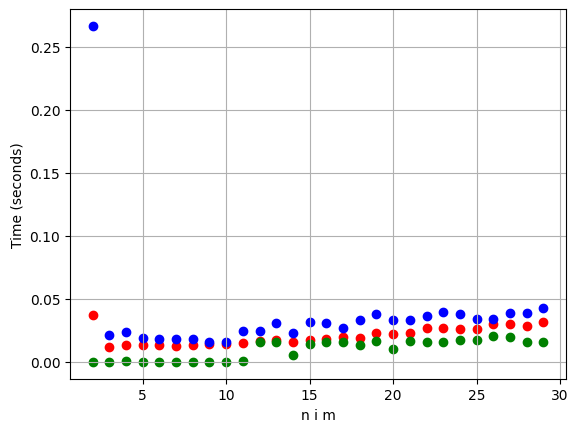

In [156]:
import matplotlib.pyplot as plt


fig = plt.figure()
plt.scatter(df['m'], df['mean_time'], c='r', marker='o')
plt.scatter(df['m'], df['min_time'], c='g', marker='o')
plt.scatter(df['m'], df['max_time'], c='b', marker='o')
plt.grid()
plt.xlabel('n i m')
plt.ylabel('Time (seconds)')

plt.show()